In [74]:
import math

path = "image/img_elias/sample1/tri/t200/after_etching/"

xVal_before = []
yVal_before = []
f = open(path + "data_before.txt", "r")
iterator = 0
for line in f:
    if iterator == 0:
        iterator += 1
        continue
    coord = line.split(' ')
    x = coord[0]
    e = x.find('e')
    if e == -1 :
        x_decimal = float(x)
        x_power = 0
    else :
        x_decimal = float(x[:e])
        x_power = 6 - int(x[e + 4])
    x_number = x_decimal * math.pow(10, x_power)
    y = coord[2]
    e = y.find('e')
    if e == -1 :
        y_decimal = float(y)
        y_power = 0
    else :
        y_decimal = float(y[:e])
        y_power = 9 - int(y[e + 2:e + 5])
    y_number = y_decimal * math.pow(10, y_power)
    iterator += 1
    xVal_before.append(round(x_number, 2))
    yVal_before.append(round(y_number, 2))
    
xVal_after = []
yVal_after = []
f = open(path + "data_after.txt", "r")
iterator = 0
for line in f:
    if iterator == 0:
        iterator += 1
        continue
    coord = line.split(' ')
    x = coord[0]
    e = x.find('e')
    if e == -1 :
        x_decimal = float(x)
        x_power = 0
    else :
        x_decimal = float(x[:e])
        x_power = 6 - int(x[e + 4])
    x_number = x_decimal * math.pow(10, x_power)
    y = coord[2]
    e = y.find('e')
    if e == -1 :
        y_decimal = float(y)
        y_power = 0
    else :
        y_decimal = float(y[:e])
        y_power = 9 - int(y[e + 2:e + 5])
    y_number = y_decimal * math.pow(10, y_power)
    iterator += 1
    xVal_after.append(round(x_number, 2))
    yVal_after.append(round(y_number, 2))

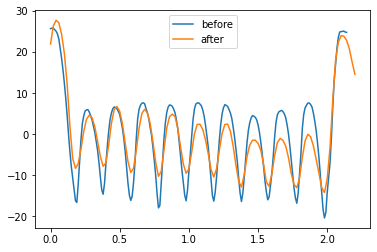

In [75]:
import matplotlib.pyplot as plt
import numpy as np
yVal_before_centered = yVal_before - np.mean(yVal_before)
yVal_after_centered = yVal_after - np.mean(yVal_after)
plt.figure()
plt.plot(xVal_before, yVal_before_centered, label="before")
plt.plot(xVal_after, yVal_after_centered, label="after")
plt.legend()

## cross correlation

In [76]:
def cross_corr(y1, y2, maxShift = 50):
    size1 = len(y1)
    size2 = len(y2)
    size = min(size1, size2)
    x = np.arange(-maxShift, maxShift + 1)
    y = np.zeros((len(x),))
    for shift in x:
        if shift < 0:
            y[shift + maxShift] = np.sum(np.multiply(y1[:size + shift], y2[-shift:size]))
        elif shift > 0:
            y[shift + maxShift] = np.sum(np.multiply(y1[shift:size], y2[:size - shift]))
        else :
            y[shift + maxShift] = np.sum(np.multiply(y1[:shift], y2[:shift]))
    return x, y, size                                          

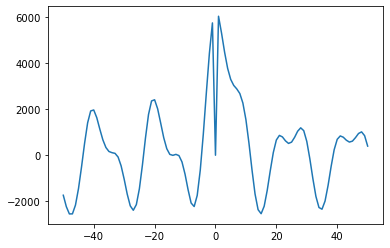

In [77]:
shift, corr, size = cross_corr(yVal_before_centered, yVal_after_centered)
plt.figure()
plt.plot(shift, corr)
idxMax = np.argmax(corr)
actualShift = shift[idxMax]


## correction

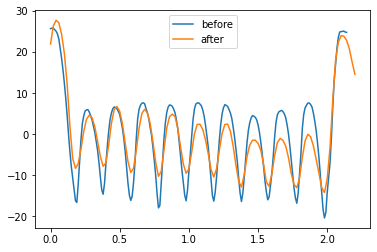

In [78]:
# yVal_before = yVal_before[:size - actualShift]
# xVal_before = xVal_before[:size - actualShift]
# yVal_after = yVal_after_centered[actualShift:size]
# xVal_after = xVal_after[actualShift:size]
plt.figure()
plt.plot(xVal_before, yVal_before_centered, label="before")
plt.plot(xVal_after, yVal_after_centered, label="after")
plt.legend()

## export data in a js file

In [79]:
txt = 'var data = [];\n'
txt += 'function Points(x1, y1, x2, y2) {\n'
txt += '\tthis.x1 = x1;\n'
txt += '\tthis.y1 = y1;\n'
txt += '\tthis.x2 = x2;\n'
txt += '\tthis.y2 = y2;\n'
txt += '}\n'
txt += '\n'

for i in range(len(xVal_before)):
    txt += 'data[' + str(i) + '] = new Points(' + str(xVal_before[i]) + ', ' + str(yVal_before[i]) + ', null, null);\n'
for i in range(len(xVal_after)):
    txt += 'data[' + str(i) + '] = new Points(null, null, ' + str(xVal_after[i]) + ', ' + str(yVal_after[i]) + ');\n'

f= open(path + "script.js","w+")
f.write(txt)
f.close()

In [88]:
xVal = set(xVal_before).union(set(xVal_after))
xVal = list(xVal)
xVal = np.sort(xVal)

txt = 'var data = [];\n'
txt += 'function Points(x, y1, y2) {\n'
txt += '\tthis.x = x;\n'
txt += '\tthis.y1 = y1;\n'
txt += '\tthis.y2 = y2;\n'
txt += '}\n'
txt += '\n'

for i in range(len(xVal)):
    x = xVal[i]
    if x in xVal_before:
        x1 = xVal_before.index(x)
        y1 = yVal_before_centered[x1]
    else:
        y1 = 'null'
        
    if x in xVal_after:
        x2 = xVal_after.index(x)
        y2 = yVal_after_centered[x2]
    else:
        y2 = 'null'
    txt += 'data[' + str(i) + '] = new Points(' + str(x) + ', ' + str(y1) + ', ' + str(y2) + ');\n'
f= open(path + "script.js","w+")
f.write(txt)
f.close()